In [1]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from IPython.display import display, Latex

In [2]:
# Defining fixed angle values
c90, c90e, c90u = [m.pi/2,-m.pi/2], [m.pi/2,m.pi/2], [m.pi/4,m.pi/2]
c45, c45e, c45u = [0,m.pi/4], [m.pi/2,m.pi/4], [m.pi/2,3*m.pi/4]
c15, c30 =  [0,m.pi/12], [0,m.pi/6]
c15u, c30u =  [3*m.pi/4,3*m.pi/4 + m.pi/12], [3*m.pi/4,3*m.pi/4 + m.pi/6]
c7point5, c3point75 =  [0,m.pi/24], [0,m.pi/48]
c7point5u, c3point75u =  [3*m.pi/4,3*m.pi/4+m.pi/24], [3*m.pi/4,3*m.pi/4 + m.pi/48]

In [3]:
def Creating_states( c = [0, m.pi/2] , input_type = 'theta'):    # coeff list like [a0,a1,b0,b1]
    
    if input_type == "coeff":
        if len(c) != 4:
            print("Error! Coefficients given in raw form have to be in form [a0,a1,b0,b1]")
        coeff = c
    
    if input_type == "theta":
        if len(c) != 2:
            print("Error! Coefficients given in theta form have to be angles: [theta_0, delta_theta]")
    
    theta_0 , theta = c[0], c[1]
    coeff = [np.cos(theta_0), np.sin(theta_0), np.cos(theta_0+theta), np.sin(theta_0+theta)] # the first state here is the theta_0 angle 
    coeff = [np.round(i,9) for i in coeff]                                                   ## from |0> axis, the second theta_0 + theta
    
        
    a0, a1, b0, b1 = coeff[0],coeff[1],coeff[2],coeff[3]
    psi0, psi1 = [a0,a1], [b0,b1]      # defining states
    return([psi0,psi1])

# Creating_states(c = [0,m.pi/2])


In [4]:
# Backup code

# def experiment(N = 10000, coeff = [0,m.pi/2], priors = [.5,.5], show_calcs = False, input_type = 'theta'):
#     initial_states = Creating_states( c = coeff, input_type= input_type)     # Creating the two states with these coefficients
#     psi0 , psi1 = initial_states[0], initial_states[1]    # created the states

#     psi0sq, psi1sq = [], []
#     [[psi0sq.append(i*j) for i in psi0] for j in psi0]
#     [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    
#     psi0psi0 = [psi0sq[0], (np.sqrt(2))*psi0sq[1], psi0sq[3]]    
#     psi1psi1 = [psi1sq[0], (np.sqrt(2))*psi1sq[1], psi1sq[3]]    # creating square states

#     vec_psi0psi0, vec_psi1psi1 = np.array(psi0psi0), np.array(psi1psi1)     # np array conversion 
#     rho = priors[0]*np.outer(vec_psi0psi0, vec_psi0psi0)+ priors[1]*np.outer(vec_psi1psi1, vec_psi1psi1)     # theoretical density matrix with priors 1/2 each.

#     # defining the measurements along the bloch vector
#     w = m.e**((2/3)*m.pi*(1j))     # the w in the notes
#     POVM_vec = (1/(2**.5))*(np.array([[0,1,-1],[-1,0,1],[1,-1,0],[0,w,-w**2],[-1,0,w**2],[1,-w,0],[0,w**2,-w],[-1,0,w],[1,-w**2,0]]))  # an array of POVM direction vectors
#     POVM_elts = [(1/3)*np.outer(np.conjugate(POVM_vec[i]),POVM_vec[i]) for i in range(len(POVM_vec))]   # a list of POVM matrices

#     prob_vec_raw =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
#     prob_vec = [round(i.real, 10) for i in prob_vec_raw if abs(i.imag) < .01]          # cleaned up theoretical prob vector

#     POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
#     #prob distribution is simply the corresponding elements of the prob_vec
#     collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

#     nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
#     pj_num_vec = [i/N for i in nj_vec]                                  # numerical prob vector     
    
#     u_0 = [1/3 for i in range(9)]
#     M_inv = 3*np.outer(u_0,u_0) + 12*(np.eye(9) - np.outer(u_0,u_0))        # creating the inverse matrix
#     r_vec = np.dot(M_inv,pj_num_vec)
    
#     # constructing the rho numrical using the r_vector etc.
#     rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
#     rho_num_raw = np.zeros_like(rho_num_list[0])
#     for matrix in rho_num_list:
#         rho_num_raw = np.add(rho_num_raw, matrix)       # created the numerical rho
    
#     # rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
#     # # Copy values from the original matrix to the top-left 3x3 of the new matrix
#     # rho_num_tilda[:3, :3] = rho_num
#     # # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

#     rho_num = np.real_if_close(np.around(rho_num_raw, decimals=5))
#     # Now doing all this to insert a null row & column on the second index (see notes)
#     rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
#     rho_num_tilda[0,0] = rho_num[0,0]
#     rho_num_tilda[0,2] = rho_num[0,1]
#     rho_num_tilda[0,3] = rho_num[0,2]
#     rho_num_tilda[2,0] = rho_num[1,0]
#     rho_num_tilda[3,0] = rho_num[2,0]
#     rho_num_tilda[2:, 2:] = rho_num[1:,1:]
#     # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

#     R_matrix = (1/np.sqrt(2))*np.array([[np.sqrt(2),0,0,0],[0,1,-1,0],[0,1,1,0],[0,0,0,np.sqrt(2)]])
#     R_matrix_inverse = np.linalg.inv(R_matrix) 

#     sigma_x = np.array([[0, 1], [1, 0]])    # warning- these are in the computational basis of qubits
#     sigma_y = np.array([[0, -1j], [1j, 0]])
#     sigma_z = np.array([[1, 0], [0, -1]])
#     identity_2 = np.identity(2)
#     identity_3 = np.identity(3)
#     identity_4 = np.identity(4)

#     sigma_x_tilda_comp = np.kron(sigma_x , identity_2)
#     sigma_y_tilda_comp = np.kron(sigma_y , identity_2)
#     sigma_z_tilda_comp = np.kron(sigma_z , identity_2)
#     sigma_x_tilda_2_comp = np.kron(identity_2, sigma_x)
#     sigma_y_tilda_2_comp = np.kron(identity_2, sigma_y)
#     sigma_z_tilda_2_comp = np.kron(identity_2, sigma_z)

#     sigma_x_tilda = np.dot(np.dot(R_matrix ,sigma_x_tilda_comp), R_matrix_inverse)
#     sigma_y_tilda = np.dot(np.dot(R_matrix ,sigma_y_tilda_comp), R_matrix_inverse)
#     sigma_z_tilda = np.dot(np.dot(R_matrix ,sigma_z_tilda_comp), R_matrix_inverse)
#     sigma_x_tilda_2 = np.dot(np.dot(R_matrix ,sigma_x_tilda_2_comp), R_matrix_inverse)
#     sigma_y_tilda_2 = np.dot(np.dot(R_matrix ,sigma_y_tilda_2_comp), R_matrix_inverse)
#     sigma_z_tilda_2 = np.dot(np.dot(R_matrix ,sigma_z_tilda_2_comp), R_matrix_inverse)

#     #testing begin
#     rho1 = np.outer(np.array([1,0,0,0]), np.array([1,0,0,0]))
#     r_x = np.trace(np.dot(sigma_x_tilda, rho1))
#     r_y = np.trace(np.dot(sigma_y_tilda, rho1))
#     r_z = np.trace(np.dot(sigma_z_tilda, rho1))        
#     # testing end

#     s_x = np.trace(np.dot(sigma_x_tilda, rho_num_tilda))
#     s_y = np.trace(np.dot(sigma_y_tilda, rho_num_tilda))
#     s_z = np.trace(np.dot(sigma_z_tilda, rho_num_tilda))        
#     s_vector = np.array([s_x, s_y, s_z])                    # s vector
#     s_square = (np.linalg.norm(s_vector))**2

#     # C matrix elts are expectation vlaues of \sigma_j tensored with \sigma_k , then rotate it to the current basis and take expectation wrt rho num
#     # to avoid mess, first creating rotated dyad operators
#     Op_C_xx = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_x)), R_matrix_inverse)
#     Op_C_xy = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_y)), R_matrix_inverse)
#     Op_C_xz = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_z)), R_matrix_inverse)
#     Op_C_yx = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_x)), R_matrix_inverse)
#     Op_C_yy = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_y)), R_matrix_inverse)
#     Op_C_yz = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_z)), R_matrix_inverse)
#     Op_C_zx = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_x)), R_matrix_inverse)
#     Op_C_zy = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_y)), R_matrix_inverse)
#     Op_C_zz = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_z)), R_matrix_inverse)
    
#     # Now finding the expecatations to get the C matrix elts
#     C_xx, C_xy, C_xz = np.trace(np.dot(Op_C_xx ,rho_num_tilda)), np.trace(np.dot(Op_C_xy ,rho_num_tilda)), np.trace(np.dot(Op_C_xz ,rho_num_tilda))
#     C_yx, C_yy, C_yz = np.trace(np.dot(Op_C_yx ,rho_num_tilda)), np.trace(np.dot(Op_C_yy ,rho_num_tilda)), np.trace(np.dot(Op_C_yz ,rho_num_tilda))
#     C_zx, C_zy, C_zz = np.trace(np.dot(Op_C_zx ,rho_num_tilda)), np.trace(np.dot(Op_C_zy ,rho_num_tilda)), np.trace(np.dot(Op_C_zz ,rho_num_tilda))     
#     C_matrix = np.array([[C_xx, C_xy, C_xz],[C_yx, C_yy, C_yz],[C_zx, C_zy, C_zz]])

#     s_prime_vector = (1/(1-s_square))*(np.dot((identity_3-C_matrix),s_vector))
#     s_prime_square = (np.linalg.norm(s_prime_vector))**2
#     X = (1-s_square)/(1-s_prime_square)
#     p_0, p_1 = (1/2)  + (1/2)*(np.sqrt(1-X)), 1/2 - (1/2)*(np.sqrt(1-X))

#     if show_calcs == True: 
#         print('Rho_num_tilda = \n', rho_num_tilda)
        
#         print('\n s_vector = \n', s_vector )
#         print('\n C_matrix = \n', C_matrix )
#         print('\n s_prime_vector = \n', s_prime_vector )
#         print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
#         print('\n X =', X )
#         print('\n p0, p1 =', p_0, p_1)
        

#     if abs(p_0-p_1) > .02:
#         print('\nmethod #1')
#         a = np.subtract(s_vector, 2*p_1*s_prime_vector)/(p_0-p_1)
#         b = np.subtract(2*p_0*s_prime_vector, s_vector)/(p_0-p_1)
#         # print('\n a vector = \n', a )
#         # print('\n b vector = \n', b )
#         eigenvalues, evecs, evals = "dummy string", "dummy string", "dummy string"
#     else:
#         print('\nmethod #2')
#         # if np.linalg.norm(np.subtract(s_vector,s_prime_vector)) > .02:
#         #     print("something wrong, s and s' vectors should be equal")
        
#         eigenvalues, eigenvectors = np.linalg.eig(C_matrix)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
#         # eigenvectors[:,0]   # for example - eigenvector correspoding to the first eigenvalue
#         evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])    # cleaning up
#         evecs = np.real_if_close(np.around(eigenvectors, decimals=6))

#         degenerate_eval_indices = []
#         for i in range(len(evals)):
#             if abs(evals[i]) < .17:  #(can make it dynamic threshold by simply using 4/sqrt(N) instead)
#                 degenerate_eval_indices.append(i)

#         evec_comb_1  = evecs[:,degenerate_eval_indices[0]]     # the COMBINATIONS (a+b) and (a-b)
#         evec_comb_2  = evecs[:,degenerate_eval_indices[1]]     

#         a = (evec_comb_1+ evec_comb_2)/2
#         b = (evec_comb_1- evec_comb_2)/2

#         if np.dot(a,b) > .04:       # again, can use dynamic threshold here
#             print("Error somewhere! The bloch vectors aren't orthogonal")

#     rho_1_num = (1/2)*(identity_2 + a[0]*sigma_x + a[1]*sigma_y + a[2]*sigma_z)   # bloch vector def.
#     rho_2_num = (1/2)*(identity_2 + b[0]*sigma_x + b[1]*sigma_y + b[2]*sigma_z)

#     if abs(np.imag(rho_1_num[0,1])) < .01:
#         psi_1_num = [np.sqrt(rho_1_num[0,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation
#     else:
#         psi_1_num = [np.sqrt(rho_1_num[0,0])*np.sqrt(rho_1_num[0,1]/rho_1_num[1,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation

#     if abs(np.imag(rho_2_num[0,1])) < .01:
#         psi_2_num = [np.sqrt(rho_2_num[0,0]), np.sqrt(rho_2_num[1,1])] # see research notebook for derivation
#     else:
#         psi_2_num = [np.sqrt(rho_2_num[0,0])*np.sqrt(rho_2_num[0,1]/rho_2_num[1,0]), np.sqrt(rho_2_num[1,1])] # see research notebook for derivation

#     # psi_1_num = [np.sqrt(rho_1_num[0,0])*np.sqrt(rho_1_num[0,1]/rho_1_num[1,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation
#     # psi_2_num = [np.sqrt(rho_2_num[0,0])*np.sqrt(rho_2_num[0,1]/rho_2_num[1,0]), np.sqrt(rho_2_num[1,1])]

#     fid_1 = (np.abs(psi_1_num[0]*psi0[0] + psi_1_num[1]*psi0[1]))**2
#     fid_2 = (np.abs(psi_2_num[0]*psi1[0] + psi_2_num[1]*psi1[1]))**2

#     if show_calcs == True:
#         # Display states in LateX
#         # latex_psi0 = r'\Psi_0 = {}|0\rangle + {}|1\rangle'.format(psi0[0],psi0[1])
#         # latex_psi1 = r'\Psi_1 = {}|0\rangle + {}|1\rangle'.format(psi1[0],psi1[1])
#         # display(Latex(f'${latex_psi0}$'))
#         # display(Latex(f'${latex_psi1}$'))

#         if 0 ==0:
#             ghghghgh = 5
#             # print(" Psi_0Psi_0 ", psi0psi0 )
#             # print(" Psi_1Psi_1 ", psi1psi1 )
#             # print(" Vec_Psi_0Psi_0 ", vec_psi0psi0)
#             # print(" Vec_Psi_1Psi_1 ", vec_psi1psi1)

#             # print('\n Rho_Theorectical = \n', rho)
#             # print('\n Rho_Numerical = \n', rho_num )
#             # print('\n Rho_Numerical_tilda = \n', rho_num_tilda )
            
#             # print('\n R_matrix = \n', R_matrix )
#             # print('\n R_matrix_inverse = \n', R_matrix_inverse)

#             # print('\n sigma_x_tilda_comp= \n', sigma_x_tilda_comp)
#             # print('\n sigma_x_tilda = \n', sigma_x_tilda )
#             # print('\n sigma_x_tilda_2_comp= \n', sigma_x_tilda_2_comp)
#             # print('\n sigma_x_tilda_2 = \n', sigma_x_tilda_2)
#             # print('\n sigma_y_tilda_comp = \n', sigma_y_tilda_comp)
#             # print('\n sigma_y_tilda = \n', sigma_y_tilda )
#             # print('\n sigma_y_tilda_2 = \n', sigma_y_tilda_2)
#             # print('\n sigma_z_tilda_comp = \n', sigma_y_tilda_comp)
#             # print('\n sigma_z_tilda = \n', sigma_z_tilda )
#             # print('\n sigma_z_tilda_2 = \n', sigma_z_tilda_2)

#         # print('\n s_vector = \n', s_vector )
#         # print('\n C_matrix = \n', C_matrix )
#         # print('\n s_prime_vector = \n', s_prime_vector )
#         # print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
#         # print('\n X =', X )
#         # print('\n p0, p1 =', p_0, p_1)
        
#         # print('\n evals_raw= \n ', eigenvalues)
#         # print('\n polished evals= \n ', evals)
#         # print('\n evecs= \n ', evecs)
        
#         print(" \n bloch vector for rho 1" , [r_x, r_y, r_z])

#         print('\n Rho_1_num \n', rho_1_num )
#         print('\n Rho_2_num \n', rho_2_num)
#         print('\n a vector:  ', a)
#         print(   'b vector:  ', b)
#         print('\n psi_1_num:  ', psi_1_num )
#         print(   'psi_2_num:  ', psi_2_num )
#         print('\n psi_1_theoretical:  ', psi0 )
#         print(   'psi_2_theoretical:  ', psi1 )
#         print('fidelities', [fid_1,fid_2])

#     # return ['e', rho, rho_num, evals, evecs, [fid_1, fid_2]]


In [5]:
#Creating (Experiment_Rho) function for the sake of ease, for the error in the density matrices. This plots 
def experiment(N = 10000, coeff = [0,m.pi/2], priors = [.5,.5], show_calcs = False, input_type = 'theta'):
    initial_states = Creating_states( c = coeff, input_type= input_type)     # Creating the two states with these coefficients
    psi0 , psi1 = initial_states[0], initial_states[1]    # created the states

    psi0sq, psi1sq = [], []
    [[psi0sq.append(i*j) for i in psi0] for j in psi0]
    [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    
    psi0psi0 = [psi0sq[0], (np.sqrt(2))*psi0sq[1], psi0sq[3]]    
    psi1psi1 = [psi1sq[0], (np.sqrt(2))*psi1sq[1], psi1sq[3]]    # creating square states

    vec_psi0psi0, vec_psi1psi1 = np.array(psi0psi0), np.array(psi1psi1)     # np array conversion 
    rho = priors[0]*np.outer(vec_psi0psi0, vec_psi0psi0)+ priors[1]*np.outer(vec_psi1psi1, vec_psi1psi1)     # theoretical density matrix with priors 1/2 each.

    # defining the measurements along the bloch vector
    w = m.e**((2/3)*m.pi*(1j))     # the w in the notes
    POVM_vec = (1/(2**.5))*(np.array([[0,1,-1],[-1,0,1],[1,-1,0],[0,w,-w**2],[-1,0,w**2],[1,-w,0],[0,w**2,-w],[-1,0,w],[1,-w**2,0]]))  # an array of POVM direction vectors
    POVM_elts = [(1/3)*np.outer(np.conjugate(POVM_vec[i]),POVM_vec[i]) for i in range(len(POVM_vec))]   # a list of POVM matrices

    prob_vec_raw =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
    prob_vec = [round(i.real, 10) for i in prob_vec_raw if abs(i.imag) < .01]          # cleaned up theoretical prob vector

    POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
    #prob distribution is simply the corresponding elements of the prob_vec
    collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

    nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
    pj_num_vec = [i/N for i in nj_vec]                                  # numerical prob vector     
    
    u_0 = [1/3 for i in range(9)]
    M_inv = 3*np.outer(u_0,u_0) + 12*(np.eye(9) - np.outer(u_0,u_0))        # creating the inverse matrix
    r_vec = np.dot(M_inv,pj_num_vec)
    
    # constructing the rho numrical using the r_vector etc.
    rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
    rho_num_raw = np.zeros_like(rho_num_list[0])
    for matrix in rho_num_list:
        rho_num_raw = np.add(rho_num_raw, matrix)       # created the numerical rho
    
    # rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
    # # Copy values from the original matrix to the top-left 3x3 of the new matrix
    # rho_num_tilda[:3, :3] = rho_num
    # # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

    rho_num = np.real_if_close(np.around(rho_num_raw, decimals=5))
    # Now doing all this to insert a null row & column on the second index (see notes)
    rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
    rho_num_tilda[0,0] = rho_num[0,0]
    rho_num_tilda[0,2] = rho_num[0,1]
    rho_num_tilda[0,3] = rho_num[0,2]
    rho_num_tilda[2,0] = rho_num[1,0]
    rho_num_tilda[3,0] = rho_num[2,0]
    rho_num_tilda[2:, 2:] = rho_num[1:,1:]
    # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

    R_matrix = (1/np.sqrt(2))*np.array([[np.sqrt(2),0,0,0],[0,1,-1,0],[0,1,1,0],[0,0,0,np.sqrt(2)]])
    R_matrix_inverse = np.linalg.inv(R_matrix) 

    sigma_x = np.array([[0, 1], [1, 0]])    # warning- these are in the computational basis of qubits
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    identity_2 = np.identity(2)
    identity_3 = np.identity(3)
    identity_4 = np.identity(4)

    sigma_x_tilda_comp = np.kron(sigma_x , identity_2)
    sigma_y_tilda_comp = np.kron(sigma_y , identity_2)
    sigma_z_tilda_comp = np.kron(sigma_z , identity_2)
    sigma_x_tilda_2_comp = np.kron(identity_2, sigma_x)
    sigma_y_tilda_2_comp = np.kron(identity_2, sigma_y)
    sigma_z_tilda_2_comp = np.kron(identity_2, sigma_z)

    sigma_x_tilda = np.dot(np.dot(R_matrix ,sigma_x_tilda_comp), R_matrix_inverse)
    sigma_y_tilda = np.dot(np.dot(R_matrix ,sigma_y_tilda_comp), R_matrix_inverse)
    sigma_z_tilda = np.dot(np.dot(R_matrix ,sigma_z_tilda_comp), R_matrix_inverse)
    sigma_x_tilda_2 = np.dot(np.dot(R_matrix ,sigma_x_tilda_2_comp), R_matrix_inverse)
    sigma_y_tilda_2 = np.dot(np.dot(R_matrix ,sigma_y_tilda_2_comp), R_matrix_inverse)
    sigma_z_tilda_2 = np.dot(np.dot(R_matrix ,sigma_z_tilda_2_comp), R_matrix_inverse)

    #testing begin
    rho1 = np.outer(np.array([1,0,0,0]), np.array([1,0,0,0]))
    r_x = np.trace(np.dot(sigma_x_tilda, rho1))
    r_y = np.trace(np.dot(sigma_y_tilda, rho1))
    r_z = np.trace(np.dot(sigma_z_tilda, rho1))        
    # testing end

    s_x = np.trace(np.dot(sigma_x_tilda, rho_num_tilda))
    s_y = np.trace(np.dot(sigma_y_tilda, rho_num_tilda))
    s_z = np.trace(np.dot(sigma_z_tilda, rho_num_tilda))        
    s_vector = np.array([s_x, s_y, s_z])                    # s vector
    s_square = (np.linalg.norm(s_vector))**2

    # C matrix elts are expectation vlaues of \sigma_j tensored with \sigma_k , then rotate it to the current basis and take expectation wrt rho num
    # to avoid mess, first creating rotated dyad operators
    Op_C_xx = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_x)), R_matrix_inverse)
    Op_C_xy = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_y)), R_matrix_inverse)
    Op_C_xz = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_z)), R_matrix_inverse)
    Op_C_yx = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_x)), R_matrix_inverse)
    Op_C_yy = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_y)), R_matrix_inverse)
    Op_C_yz = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_z)), R_matrix_inverse)
    Op_C_zx = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_x)), R_matrix_inverse)
    Op_C_zy = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_y)), R_matrix_inverse)
    Op_C_zz = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_z)), R_matrix_inverse)
    
    # Now finding the expecatations to get the C matrix elts
    C_xx, C_xy, C_xz = np.trace(np.dot(Op_C_xx ,rho_num_tilda)), np.trace(np.dot(Op_C_xy ,rho_num_tilda)), np.trace(np.dot(Op_C_xz ,rho_num_tilda))
    C_yx, C_yy, C_yz = np.trace(np.dot(Op_C_yx ,rho_num_tilda)), np.trace(np.dot(Op_C_yy ,rho_num_tilda)), np.trace(np.dot(Op_C_yz ,rho_num_tilda))
    C_zx, C_zy, C_zz = np.trace(np.dot(Op_C_zx ,rho_num_tilda)), np.trace(np.dot(Op_C_zy ,rho_num_tilda)), np.trace(np.dot(Op_C_zz ,rho_num_tilda))     
    C_matrix = np.array([[C_xx, C_xy, C_xz],[C_yx, C_yy, C_yz],[C_zx, C_zy, C_zz]])

    s_prime_vector = (1/(1-s_square))*(np.dot((identity_3-C_matrix),s_vector))
    s_prime_square = (np.linalg.norm(s_prime_vector))**2

    # if show_calcs == True: 
    #     print('Rho_num_tilda = \n', rho_num_tilda)
        
    #     print('\n s_vector = \n', s_vector )
    #     print('\n C_matrix = \n', C_matrix )
    #     print('\n s_prime_vector = \n', s_prime_vector )
    #     print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
    #     print('\n X =', X )
    #     print('\n p0, p1 =', p_0, p_1)
        

    if (s_square- s_prime_square) > -4/(np.sqrt(N)):
        if abs(s_square- s_prime_square) < 4/(np.sqrt(N)):
            p_0,p_1 = .5,.5
            evals, evecs = np.linalg.eig(C_matrix)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
            degenerate_eval_indices = []
            for i in range(len(evals)):
                if abs(evals[i]) < .17:  #(can make it dynamic threshold by simply using 4/sqrt(N) instead)
                    degenerate_eval_indices.append(i)
            evec_comb_1, evec_comb_2  = evecs[:,degenerate_eval_indices[0]], evecs[:,degenerate_eval_indices[1]]     # the COMBINATIONS (a+b) and (a-b)
            a, b = (evec_comb_1+ evec_comb_2)/2, (evec_comb_1- evec_comb_2)/2
        else:
            X = (1-s_square)/(1-s_prime_square)
            p_0, p_1 = (1/2)+(1/2)*(np.sqrt(1-X)), 1/2 - (1/2)*(np.sqrt(1-X))
            a = np.subtract(s_vector, 2*p_1*s_prime_vector)/(p_0-p_1)
            b = np.subtract(2*p_0*s_prime_vector, s_vector)/(p_0-p_1)

    # elif (s_square- s_prime_square) <= -4/(np.sqrt(N)):
    #     return [0,0]


    rho_1_num = (1/2)*(identity_2 + a[0]*sigma_x + a[1]*sigma_y + a[2]*sigma_z)   # using bloch vector def.
    rho_2_num = (1/2)*(identity_2 + b[0]*sigma_x + b[1]*sigma_y + b[2]*sigma_z)

    if abs(np.imag(rho_1_num[0,1])) < .01:
        psi_1_num = [np.sqrt(rho_1_num[0,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation
    else:
        psi_1_num = [np.sqrt(rho_1_num[0,0])*np.sqrt(rho_1_num[0,1]/rho_1_num[1,0]), np.sqrt(rho_1_num[1,1])] 

    if abs(np.imag(rho_2_num[0,1])) < .01:
        psi_2_num = [np.sqrt(rho_2_num[0,0]), np.sqrt(rho_2_num[1,1])] 
    else:
        psi_2_num = [np.sqrt(rho_2_num[0,0])*np.sqrt(rho_2_num[0,1]/rho_2_num[1,0]), np.sqrt(rho_2_num[1,1])] 

    fid_1, fid_2 = (np.abs(psi_1_num[0]*psi0[0] + psi_1_num[1]*psi0[1]))**2, (np.abs(psi_2_num[0]*psi1[0] + psi_2_num[1]*psi1[1]))**2

    if show_calcs == True:
        # Display states in LateX
        # latex_psi0 = r'\Psi_0 = {}|0\rangle + {}|1\rangle'.format(psi0[0],psi0[1])
        # latex_psi1 = r'\Psi_1 = {}|0\rangle + {}|1\rangle'.format(psi1[0],psi1[1])
        # display(Latex(f'${latex_psi0}$'))
        # display(Latex(f'${latex_psi1}$'))

        if 0 ==0:
            ghghghgh = 5
            # print(" Psi_0Psi_0 ", psi0psi0 )
            # print(" Psi_1Psi_1 ", psi1psi1 )
            # print(" Vec_Psi_0Psi_0 ", vec_psi0psi0)
            # print(" Vec_Psi_1Psi_1 ", vec_psi1psi1)

            # print('\n Rho_Theorectical = \n', rho)
            # print('\n Rho_Numerical = \n', rho_num )
            # print('\n Rho_Numerical_tilda = \n', rho_num_tilda )
            
            # print('\n R_matrix = \n', R_matrix )
            # print('\n R_matrix_inverse = \n', R_matrix_inverse)

            # print('\n sigma_x_tilda_comp= \n', sigma_x_tilda_comp)
            # print('\n sigma_x_tilda = \n', sigma_x_tilda )
            # print('\n sigma_x_tilda_2_comp= \n', sigma_x_tilda_2_comp)
            # print('\n sigma_x_tilda_2 = \n', sigma_x_tilda_2)
            # print('\n sigma_y_tilda_comp = \n', sigma_y_tilda_comp)
            # print('\n sigma_y_tilda = \n', sigma_y_tilda )
            # print('\n sigma_y_tilda_2 = \n', sigma_y_tilda_2)
            # print('\n sigma_z_tilda_comp = \n', sigma_y_tilda_comp)
            # print('\n sigma_z_tilda = \n', sigma_z_tilda )
            # print('\n sigma_z_tilda_2 = \n', sigma_z_tilda_2)

        print('\n s_vector = \n', s_vector )
        print('\n C_matrix = \n', C_matrix )
        print('\n s_prime_vector = \n', s_prime_vector )
        print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
        # print('\n X =', X )
        # print('\n p0, p1 =', p_0, p_1)
        
        # print('\n evals_raw= \n ', eigenvalues)
        print('\n polished evals= \n ', evals)
        print('\n evecs= \n ', evecs)
        
        print(" \n bloch vector for rho 1" , [r_x, r_y, r_z])

        print('\n Rho_1_num \n', rho_1_num )
        print('\n Rho_2_num \n', rho_2_num)
        print('\n a vector:  ', a)
        print(   'b vector:  ', b)
        print('\n psi_1_num:  ', psi_1_num )
        print(   'psi_2_num:  ', psi_2_num )
        print('\n psi_1_theoretical:  ', psi0 )
        print(   'psi_2_theoretical:  ', psi1 )
        print('fidelities', [fid_1,fid_2])

    # return ['e', rho, rho_num, evals, evecs, [fid_1, fid_2]]
    return [fid_1, fid_2]

In [14]:
# experiment(40000, [m.pi/6, m.pi/6],show_calcs=True)
experiment(400000, [m.pi/6, m.pi/6], priors = [.25,.75])

[0.7419445937869076, 0.7478697285344504]

In [ ]:
# Plotting function for both quantities

def Plotting(N = 10000, c = [0,m.pi/2], p = [.5,.5], step = 100, metric = 'f', size = [3,3], k = 10, starting_step = 10, input_type = 'coeff'):        # function to plot error vs trials plot. N,c,p are Number of trials, coefficients and priors
    
    # if input_type == 'theta':           # Warning: angles must be in radians, order must be theta_0 and theta_1
    #     if len(c) != 2:
    #         print("For theta input type only two angles are to be given, in radians.")
    #     theta_0 = c[0]
    #     theta = c[1]
    #     c = [np.cos(theta_0), np.sin(theta_0), np.cos(theta_0+theta), np.sin(theta_0+theta)] # the first state here is the theta_0 angle 
    #     c = [np.round(i,9) for i in c]                                                   ## from |0> axis, the second theta_0 + theta
    # print("Input state coefficients =", c)
    
    if type(k) == int or type(k) == float:
        k = [k,k]
    elif len(k) > 2:
        print("Error: k has to be two numbers")

    count = N//step
    # trials_list = [step*(i+1) for i in range(count)] 
    trials_list = [step*(i) for i in range(1,count+1)]    # only works if N is a multiple of 100
    sqrtN = [k[0]/((i)**.5) for i in trials_list]    # ideal curve, k is steepness
    # sqrt_fid = [(1-1/((k*i))) for i in trials_list]   #  1/N curve
    
    inv_sqrt_curve0 = [(1-1/(np.sqrt(k[0]*i))) for i in trials_list]   # Ideal Sq root Curve for Fidelity
    inv_sqrt_curve1 = [(1-1/(np.sqrt(k[1]*i))) for i in trials_list]   # Ideal Sq root Curve for Fidelity

    errors_list_0 = [] 
    errors_list_1 = []
    convergance = ''
    
    if metric == 'f':
        label_0 = r' Fidelity $| \Psi_0 \rangle $'
        label_1 = r' Fidelity $| \Psi_1\rangle$'
        errors_list_0 = [experiment(i,c,p)[-1][0] for i in trials_list]
        errors_list_1 = [experiment(i,c,p)[-1][1] for i in trials_list]
        lasts_0 = errors_list_0[len(errors_list_0)*99//100:]
        lasts_1 = errors_list_1[len(errors_list_1)*99//100:]
        # convergance = f'Fidelity Coverged to:  , {()}'
    # else: 
    #     label_0 = r'$\Delta \rho$'
    #     errors_list_0 = [experiment_rho(i, c , p)[0] for i in trials_list]
    #     lasts_0 = errors_list_0[len(errors_list_0)*99//100:]
    #     # convergance = f'Error Coverged to:  , {errors_list_0[-1]}'

    plt.figure(figsize=(size[0],size[1]))
    plt.ylabel(r'$|\Delta \rho|$')
    # convergance = 0
    # fid
    # plt.plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0)         # skipping plotting the first five entries coz of errors
    if metric=='f':
        plt.subplot(1,2,1)
        plt.plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0)         # skipping plotting the first five entries coz of errors
        if k[0] != 0:                                                                                  # put k=0 if the ideal curve is not needed
            plt.plot(trials_list[starting_step//2:],inv_sqrt_curve0[starting_step//2:], "--", label=r'$(1-\frac{1}{\sqrt{kN}})$; $k_0 =$ '+f"{k[0]}", color = 'black')    # sqrt N error qualitatively
        plt.ylabel('Fidelity')
        # plt.xlabel(f' Trials ')
        plt.title(r'|$\Psi_0\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(c[0],3), round(c[1],3)))
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(trials_list[starting_step:], errors_list_1[starting_step:], label=label_1, color = 'orange')
        if k != 0:                                                                                  # put k=0 if the ideal curve is not needed
            plt.plot(trials_list[starting_step//2:],inv_sqrt_curve1[starting_step//2:], "--", label=r'$(1-\frac{1}{\sqrt{kN}})$; $k_1 =$ '+f"{k[1]}", color = 'black')    # sqrt N error qualitatively
        # plt.xlabel(f' Trials ')
        plt.title(r'|$\Psi_1\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(c[2],3), round(c[3],3)))
        
        convergance=[np.round((sum(lasts_0)/len(lasts_0)),5), np.round((sum(lasts_1)/len(lasts_1)),5)]  # average convergances
        plt.legend()
        
        # plt.tight_layout()
    else:
        plt.plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0)         # skipping plotting the first five entries coz of errors
        plt.plot(trials_list[starting_step//2:],sqrtN[starting_step//2:], "--", label= r'$\frac{1}{\sqrt{kN}}$;'+f" k = {k}")
        convergance=[np.round((sum(lasts_0)/len(lasts_0)),7)]  # average convergances
    
    plt.suptitle(r' Reconstructed Quantum States $|\Psi_0\rangle$ & $|\Psi_1\rangle$ with priors $\eta_i$ = ({}, {}) respecitvely '.format(p[0], p[1]))       # title of the entire plot
    # plt.title(r'$|\psi_0\rangle ={}|0\rangle+{}|1\rangle $, $|\psi_1\rangle ={}|0\rangle+{}|1\rangle $, $\eta_1={},\,\eta_2={}$'.format(round(c[0],3), round(c[1],3), round(c[2],3), round(c[3],3), p[0], p[1]))
    plt.figtext(0.5, 0.01, f"Average converagance of last 1% values at {convergance} respectively", ha='center', va='bottom') # subcaption at the bottom
    plt.show()


In [15]:
experiment(10000, [0, m.pi/2], show_calcs=True, priors= [.75,.25])


 s_vector = 
 [ 0.02616295+4.87890978e-19j -0.00562857+0.00000000e+00j
  0.4894    +0.00000000e+00j]

 C_matrix = 
 [[-2.00000000e-04+0.00000000e+00j  9.70000000e-03+0.00000000e+00j
  -9.47523087e-03-3.79470760e-19j]
 [ 9.70000000e-03+0.00000000e+00j -3.46000000e-02+0.00000000e+00j
   4.15778787e-03-1.73472348e-18j]
 [-9.47523087e-03-3.79470760e-19j  4.15778787e-03-1.73472348e-18j
   1.03480000e+00+0.00000000e+00j]]

 s_prime_vector = 
 [ 0.04061742+8.86716048e-19j -0.01067679+1.11117773e-18j
 -0.02205902+6.30050259e-21j]

 s^2 and (s_prime^2) = 0.24022854079999995 0.002250369470314159


UnboundLocalError: cannot access local variable 'evals' where it is not associated with a value

In [16]:
experiment(100000, [0, m.pi/2], show_calcs=True, priors= [.5,.5])




 s_vector = 
 [-0.00632153-4.33680869e-19j -0.0014425 +0.00000000e+00j
  0.01      +0.00000000e+00j]

 C_matrix = 
 [[ 0.01582   +0.00000000e+00j -0.00434   +0.00000000e+00j
  -0.00196576-4.33680869e-19j]
 [-0.00434   +0.00000000e+00j -0.01302   +0.00000000e+00j
  -0.0066468 +8.67361738e-19j]
 [-0.00196576-4.33680869e-19j -0.0066468 +8.67361738e-19j
   0.9972    +0.00000000e+00j]]

 s_prime_vector = 
 [-6.20901276e-03-4.22543248e-19j -1.42244863e-03-1.05572919e-20j
  5.98625030e-06-2.34320518e-21j]

 s^2 and (s_prime^2) = 0.00014204259999999903 4.057523541471497e-05

 polished evals= 
  [ 0.01645798-1.10475605e-21j -0.01370553+1.07906861e-20j
  0.99724755-9.68593003e-21j]

 evecs= 
  [[ 9.89302132e-01+0.00000000e+00j  1.45867733e-01+1.00690620e-19j
  -1.97385340e-03-4.45701590e-19j]
 [-1.45877699e-01-1.03785122e-19j  9.89280811e-01+0.00000000e+00j
  -6.57061662e-03+8.60378048e-19j]
 [ 9.94254337e-04+5.65774887e-19j  6.78826622e-03-7.85961762e-19j
   9.99976465e-01+0.00000000e+00j]]
 


[0.5019456301403341, 0.5014485029716925]

In [ ]:
experiment(4000000, [0, m.pi/2], show_calcs=True, priors= [.5,.5])


 s_vector = 
 [ 4.24264069e-05+5.42101086e-20j  5.51543289e-04+2.71050543e-20j
 -2.50000000e-04+0.00000000e+00j]

 C_matrix = 
 [[-9.70000000e-04+0.00000000e+00j -1.20000000e-03+0.00000000e+00j
  -7.77817459e-04+5.42101086e-20j]
 [-1.20000000e-03+0.00000000e+00j  5.10000000e-04+0.00000000e+00j
   6.64680374e-04+0.00000000e+00j]
 [-7.77817459e-04+5.42101086e-20j  6.64680374e-04+0.00000000e+00j
   1.00046000e+00+0.00000000e+00j]]

 s_prime_vector = 
 [ 4.29349739e-05+5.43087910e-20j  5.51479287e-04+2.71562929e-20j
 -2.18600081e-07+2.18494392e-23j]

 s^2 and (s_prime^2) = 3.685000000000141e-07 3.059728640345593e-07

 polished evals= 
  [-0.00163995+3.35707981e-23j  0.0011789 +5.07262217e-23j
  1.00046105-8.42970198e-23j]

 evecs= 
  [[ 8.73239341e-01+0.00000000e+00j -4.87290929e-01-2.22806599e-20j
  -7.77503183e-04+5.41326262e-20j]
 [ 4.87291420e-01+2.22179811e-20j  8.73239159e-01+0.00000000e+00j
   6.65645615e-04-6.49062169e-23j]
 [ 3.54583155e-04-4.72539246e-20j -9.60138568e-04+2.64177

[0.4998486111467404, 0.49967131956909566]

TypeError: object of type 'generator' has no len()

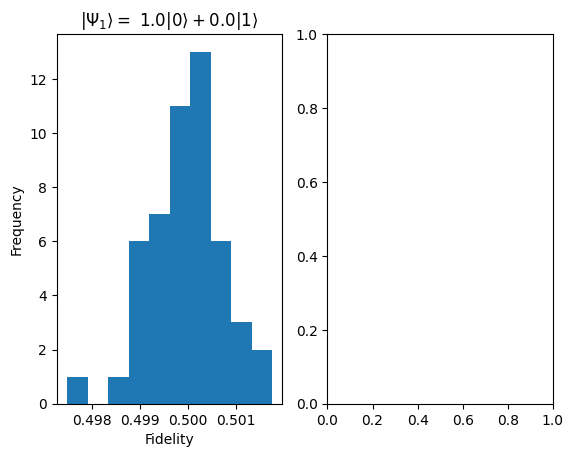

In [ ]:
def Histogram_Englert( N_hist = 50 , N= 500000, coeff = [0,m.pi/2], p = [.5,.5]):
    psi_1, psi_2 = [m.cos(coeff[0]), m.sin(coeff[0])], [m.cos(coeff[0]+ coeff[1]), m.sin(coeff[0]+ coeff[1])]
    trials = range(N_hist)
    fidelities_list = [experiment(N, coeff, priors = p) for i in trials]        # list of the two fidelities

    plt.subplot(1,2,1)
    plt.hist([i[0] for i in fidelities_list])
    plt.ylabel(r'Frequency')
    plt.xlabel(r'Fidelity')
    plt.title(r'|$\Psi_1\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(psi_1[0],3), round(psi_1[1],3)))
    # plt.legend()

    plt.subplot(1,2,2)
    plt.hist(i[1] for i in fidelities_list)
    plt.ylabel(r'Frequency')
    plt.xlabel(r'Fidelity')
    plt.title(r'|$\Psi_2\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(psi_2[0],3), round(psi_2[1],3)))

    # plt.legend()

Histogram_Englert()